# Курс: Научное моделирование на Julia. Часть 3: Популяционная динамика

# Course: Scientific Modeling in Julia. Part 3: Population Dynamics

## Модель «Хищник-Жертва» Лотки-Вольтерра

## Lotka-Volterra Predator-Prey Model

In [3]:
# ╔═╡ cells_for_setup
# ┌─ Setup / Настройка окружения
# └─ Install and import necessary packages / Установка и импорт необходимых пакетов
    # Using Pkg to manage dependencies / Управление зависимостями через Pkg
    # using Pkg
    # Pkg.add(["DifferentialEquations", "Plots", "LaTeXStrings", "Printf"]) # Раскомментируйте для установки
    
    using DifferentialEquations
    using Plots
    using LaTeXStrings
    using Printf
    
    # Setting plot theme / Настройка темы графиков
    gr() # Using GR backend for performance / Используем бэкенд GR для производительности
    default(
        legend = :topleft,
        titlefont = (12, "Arial"),
        guidefont = (10, "Arial"),
        tickfont = (8, "Arial"),
        framestyle = :box
    )

# 1. Историческая справка и научный контекст

# 1. Historical Background and Scientific Context

## 1.1. Зарождение теории / Origins of the Theory

**RU:** 
Модель Лотки-Вольтерра является краеугольным камнем математической биологии. Она была предложена независимо двумя учеными в 1920-х годах. 

1.  **Альфред Лотка (1925):** Американский физико-химик и демограф. В своей книге *«Elements of Physical Biology»* он рассматривал химические реакции как аналоги биологических взаимодействий. Лотка искал общие законы эволюции живых систем, применяя термодинамический подход.
2.  **Вито Вольтерра (1926):** Итальянский математик. Его интерес был вызван практической задачей. Его зять, биолог Умберто Д'Анкона, изучал данные рыболовства в Адриатическом море во время Первой мировой войны. Д'Анкона заметил, что в годы войны (когда рыболовство было прекращено) доля хищных рыб (акул, скатов) резко возросла, хотя вылавливали их меньше. Вольтерра математически объяснил этот парадокс: прекращение вылова снизило смертность жертв, что привело к росту популяции хищников.

**EN:**
The Lotka-Volterra model is a cornerstone of mathematical biology. It was proposed independently by two scientists in the 1920s.

1.  **Alfred J. Lotka (1925):** An American physical chemist and demographer. In his book *"Elements of Physical Biology"*, he considered chemical reactions as analogs to biological interactions. Lotka sought general laws of evolution of living systems, applying a thermodynamic approach.
2.  **Vito Volterra (1926):** An Italian mathematician. His interest was sparked by a practical problem. His son-in-law, biologist Umberto D'Ancona, studied fishery data in the Adriatic Sea during World War I. D'Ancona noticed that during the war years (when fishing ceased), the proportion of predatory fish (sharks, rays) increased sharply, even though they were caught less. Volterra mathematically explained this paradox: the cessation of fishing reduced prey mortality, leading to a growth in the predator population.

> **Ключевые источники / Key Sources:**
>
> 1. Lotka, A. J. (1925). *Elements of Physical Biology*. Williams & Wilkins.
> 2. Volterra, V. (1926). "Variazioni e fluttuazioni del numero d'individui in specie animali conviventi". *Mem. R. Accad. Naz. dei Lincei*.
> 3. Kingsland, S. E. (1985). *Modeling Nature: Episodes in the History of Population Ecology*.



## 1.2. Влияние на науку / Impact on Science

**RU:**
Модель продемонстрировала, что детерминированные системы могут порождать колебания без внешних периодических воздействий. Это изменило представление экологов о стабильности экосистем. До этого считалось, что колебания численности вызваны только изменениями климата. Лотка-Вольтерра показала эндогенную природу циклов.

**EN:**
The model demonstrated that deterministic systems can generate oscillations without external periodic forcing. This changed ecologists' view on ecosystem stability. Previously, it was believed that population fluctuations were caused only by climate changes. Lotka-Volterra showed the endogenous nature of cycles.


# 2. Математическая формулировка

# 2. Mathematical Formulation

**RU:**
Классическая модель описывается системой двух нелинейных обыкновенных дифференциальных уравнений (ОДУ):

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta xy \\
\frac{dy}{dt} &= \delta xy - \gamma y
\end{aligned}
$$

Где:

*   $x(t)$ — численность жертв (Prey).
*   $y(t)$ — численность хищников (Predator).
*   $\alpha$ — коэффициент рождаемости жертв (Prey birth rate).
*   $\beta$ — коэффициент смертности жертв от хищников (Predation rate).
*   $\gamma$ — коэффициент смертности хищников (Predator death rate).
*   $\delta$ — коэффициент прироста хищников за счет поедания жертв (Conversion efficiency).

**EN:**
The classical model is described by a system of two nonlinear ordinary differential equations (ODEs):

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta xy \\
\frac{dy}{dt} &= \delta xy - \gamma y
\end{aligned}
$$

Where:

*   $x(t)$ — Prey population.
*   $y(t)$ — Predator population.
*   $\alpha$ — Prey birth rate.
*   $\beta$ — Predation rate.
*   $\gamma$ — Predator death rate.
*   $\delta$ — Conversion efficiency (predator growth per prey eaten).

In [4]:
# ╔═╡ cells_for_model_def
# ┌─ Определение модели / Model Definition
# └─ Defining the Lotka-Volterra ODE function

function lotka_volterra!(du, u, p, t)
    # u[1] = x (Prey / Жертвы), u[2] = y (Predator / Хищники)
    x, y = u
    # p = [α, β, γ, δ]
    α, β, γ, δ = p
    
    # Уравнения / Equations
    dx = α * x - β * x * y
    dy = δ * x * y - γ * y
    
    du[1] = dx
    du[2] = dy
    return nothing
end

lotka_volterra! (generic function with 1 method)

# 3. Численное решение и Визуализация

# 3. Numerical Solution and Visualization

**RU:**
Мы используем пакет `DifferentialEquations.jl` — один из самых мощных инструментов для решения ОДУ в мире. Для визуализации применим `Plots.jl`.

**EN:**
We use the `DifferentialEquations.jl` package — one of the most powerful tools for solving ODEs in the world. For visualization, we apply `Plots.jl`.

In [9]:
# ╔═╡ cells_for_simulation
# ┌─ Параметры и решение / Parameters and Solution
# └─ Setting parameters and solving the ODE

# Параметры / Parameters (Typical values / Типичные значения)
α = 1.0   # Рост жертв / Prey growth
β = 0.1   # Смерть от хищников / Prey death by predation
γ = 1.5   # Смерть хищников / Predator death
δ = 0.075 # Рост хищников / Predator growth

p = [α, β, γ, δ]

# Начальные условия / Initial Conditions
# Важно: x0 > γ/δ и y0 > 0 для наблюдения циклов
# Important: x0 > γ/δ and y0 > 0 to observe cycles
u0 = [40.0, 9.0] 

# Временной интервал / Time span
tspan = (0.0, 50.0)

# Создание проблемы / Create Problem
prob = ODEProblem(lotka_volterra!, u0, tspan, p)

# Решение / Solve (Tsit5() - метод Рунге-Кутты 5-го порядка)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);

println("Simulation completed successfully. Final values: x($(sol.t[end])) = $(sol[end][1]), y($(sol.t[end])) = $(sol[end][2])\n")

Simulation completed successfully. Final values: x(50.0) = 25.072891657077843, y(50.0) = 22.23205341696724



## 3.1. Временные ряды / Time Series

**RU:**
График показывает классическое запаздывание: пик популяции хищников следует за пиком популяции жертв.

**EN:**
The plot shows the classic lag: the predator population peak follows the prey population peak.

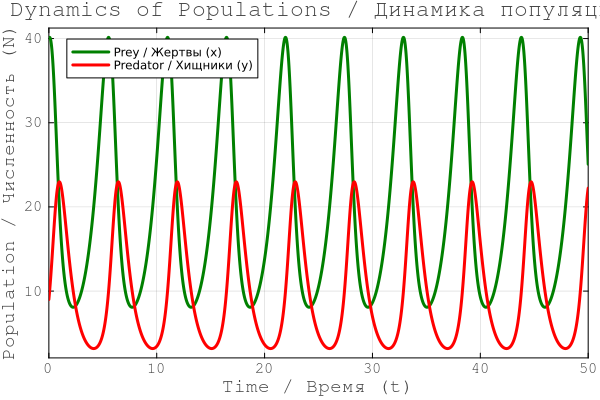

GKS: could not find font Arial.ttf


In [10]:
# ╔═╡ cells_for_plot_time
# ┌─ График численности во времени / Population vs Time Plot

plot(sol, 
     xlabel = "Time / Время (t)", 
     ylabel = "Population / Численность (N)",
     label = ["Prey / Жертвы (x)" "Predator / Хищники (y)"],
     linewidth = 3,
     title = "Dynamics of Populations / Динамика популяций",
     color = [:green :red])

## 3.2. Фазовый портрет / Phase Portrait

**RU:**
Фазовый портрет (Зависимость $y$ от $x$) показывает замкнутые орбиты. Это означает, что система является консервативной (в данной упрощенной версии) и возвращается в исходное состояние. Точка равновесия находится в центре $(\gamma/\delta, \alpha/\beta)$.

**EN:**
The phase portrait ($y$ vs $x$) shows closed orbits. This means the system is conservative (in this simplified version) and returns to the initial state. The equilibrium point is at the center $(\gamma/\delta, \alpha/\beta)$.

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


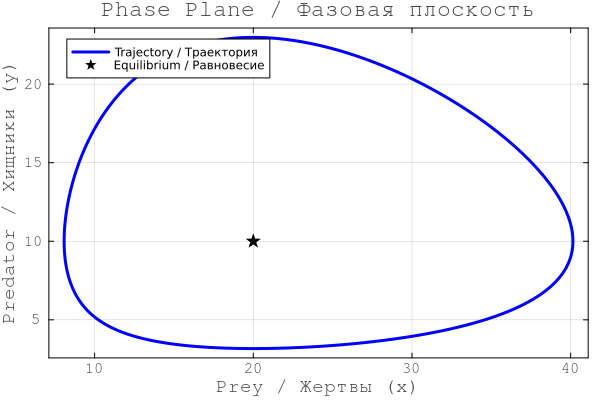

In [11]:
# ╔═╡ cells_for_plot_phase
# ┌─ Фазовый портрет / Phase Portrait

plot(sol, 
     vars = (1, 2), 
     xlabel = "Prey / Жертвы (x)", 
     ylabel = "Predator / Хищники (y)",
     title = "Phase Plane / Фазовая плоскость",
     linewidth = 3,
     color = :blue,
     label = "Trajectory / Траектория")

# Точка равновесия / Equilibrium Point
x_eq = γ / δ
y_eq = α / β
scatter!([x_eq], [y_eq], 
         label = "Equilibrium / Равновесие", 
         color = :black, 
         markersize = 8, 
         marker = :star5)

## 3.3. Анимация динамики / Animation of Dynamics

**RU:**
Создадим анимацию, показывающую движение точки по фазовой плоскости одновременно с изменением графика во времени. Это помогает интуитивно связать фазовую траекторию с временными рядами.

**EN:**
Let's create an animation showing the point moving on the phase plane simultaneously with the time series change. This helps intuitively link the phase trajectory with time series.

In [13]:
# ╔═╡ cells_for_animation
# ┌─ Создание анимации / Creating Animation
# └─ Note: This may take a few seconds to render / Примечание: Рендеринг может занять несколько секунд

# Подготавливаем кадры / Prepare frames
anim = @animate for i in 1:10:length(sol.t)
    # Создаем layout: 2 графика рядом / Create layout: 2 plots side by side
    l = @layout [a b]
    
    # 1. Временной ряд с текущей точкой / Time series with current point
    p1 = plot(sol, 
              idxs = 1, 
              xlims = (tspan[1], tspan[2]), 
              label = "Prey", 
              color = :green, 
              linewidth = 2,
              title = "Time / Время")
    plot!(sol.t[1:i], sol[1, 1:i], color = :green, linewidth = 3)
    scatter!([sol.t[i]], [sol[1, i]], color = :green, label = "")
    
    p2 = plot(sol, 
              idxs = 2, 
              xlims = (tspan[1], tspan[2]), 
              label = "Predator", 
              color = :red, 
              linewidth = 2,
              title = "")
    plot!(sol.t[1:i], sol[2, 1:i], color = :red, linewidth = 3)
    scatter!([sol.t[i]], [sol[2, i]], color = :red, label = "")
    
    # 2. Фазовый портрет с текущей точкой / Phase portrait with current point
    p3 = plot(sol, 
              vars = (1, 2), 
              label = "", 
              color = :blue, 
              linewidth = 1, 
              alpha = 0.5,
              title = "Phase Plane / Фазовая плоскость",
              xlabel = "Prey", ylabel = "Predator")
    plot!(sol[1, 1:i], sol[2, 1:i], color = :blue, linewidth = 3)
    scatter!([sol[1, i]], [sol[2, i]], color = :black, markersize = 8, label = "Current")
    
    # Объединяем / Combine
    plot(p1, p3, layout = l, size = (800, 400))
end

# Сохранение анимации (раскомментируйте для сохранения в файл)
gif(anim, "lotka_volterra_anim.gif", fps = 15)

# Отображение в блокноте / Display in notebook
anim

[ Info: Saved animation to c:\Users\Александр\Documents\Projects2026\JuliaProg\JuliaPrograms\lotka_volterra_anim.gif


Animation("C:\\Users\\8523~1\\AppData\\Local\\Temp\\jl_vgc6i9", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000061.png", "000062.png", "000063.png", "000064.png", "000065.png", "000066.png", "000067.png", "000068.png", "000069.png", "000070.png"])

# 4. Теория против Практики: Реалистичные примеры

# 4. Theory vs. Practice: Realistic Examples

## 4.1. Заяц и Рысь (Hudson Bay Company)

## 4.1. Hare and Lynx (Hudson Bay Company)

**RU:**
Самый известный пример — данные компании Гудзонова залива (с 1845 по 1935 год) о заготовке шкур зайца (*Lepus americanus*) и рыси (*Lynx canadensis*). Графики показывают циклы примерно в 10 лет.

**Однако:**

1.  **Корреляция $\neq$ Причинность:** Данные отражают количество *пойманных* животных, а не общую популяцию.
2.  **Сложность:** Поздние исследования (например, *Krebs et al., 2001*) показали, что циклы зайцев зависят не только от рысей, но и от доступности корма (растительности). Когда зайцев много, они выедают корм, и популяция падает даже без хищников.
3.  **Форма цикла:** В модели Лотки-Вольтерра циклы синусоидальные. В реальности пики зайцев острые, а спады пологие.

**EN:**
The most famous example is the Hudson Bay Company data (1845–1935) on the trapping of snowshoe hare (*Lepus americanus*) and lynx (*Lynx canadensis*) pelts. The graphs show cycles of approximately 10 years.

**However:**

1.  **Correlation $\neq$ Causation:** Data reflects the number of *trapped* animals, not the total population.
2.  **Complexity:** Later studies (e.g., *Krebs et al., 2001*) showed that hare cycles depend not only on lynx but also on food availability (vegetation). When hares are abundant, they deplete food, and the population drops even without predators.
3.  **Cycle Shape:** In the Lotka-Volterra model, cycles are sinusoidal. In reality, hare peaks are sharp, and declines are gradual.

> **Source:** Krebs, C. J., et al. (2001). "What drives the 10-year cycle of snowshoe hares?". *BioScience*.



## 4.2. Микрокосмы (Протисты)

## 4.2. Microcosms (Protists)

**RU:**
Более точное совпадение с моделью наблюдается в лабораторных условиях с микроорганизмами. Например, эксперименты Гаузе (1930-е) с инфузориями *Paramecium* (жертва) и *Didinium* (хищник).

*   **Проблема:** В простой чашке Петри хищник часто съедает всех жертв и затем вымирает сам.
*   **Решение:** Чтобы получить устойчивые циклы, нужно добавить укрытия для жертв или миграцию (метапопуляции).

**EN:**
A closer match to the model is observed in laboratory conditions with microorganisms. For example, Gause's experiments (1930s) with ciliates *Paramecium* (prey) and *Didinium* (predator).

*   **Problem:** In a simple Petri dish, the predator often eats all prey and then goes extinct itself.
*   **Solution:** To achieve stable cycles, one must add refuges for prey or migration (metapopulations).

> **Source:** Gause, G. F. (1934). *The Struggle for Existence*.



# 5. Ограничения модели Лотки-Вольтерра

# 5. Limitations of the Lotka-Volterra Model

**RU:**
Несмотря на историческую важность, «классическая» модель имеет серьезные недостатки для реального моделирования:

1.  **Структурная неустойчивость (Neutral Stability):** Амплитуда колебаний зависит от начальных условий. В реальности экосистемы должны возвращаться к одному аттрактору после возмущений (асимптотическая устойчивость).
2.  **Отсутствие емкости среды:** Жертвы растут экспоненциально ($\alpha x$) при отсутствии хищников. В реальности есть предел (логистический рост).
3.  **Линейный функциональный отклик:** Скорость поедания пропорциональна встрече ($\beta xy$). В реальности хищник насыщается (Тип II по Холлингу).
4.  **Отсутствие стохастичности:** В малых популяциях случайные события могут привести к вымиранию, что детерминированная модель не учитывает.

**EN:**
Despite historical importance, the "classical" model has serious drawbacks for real-world modeling:

1.  **Structural Instability (Neutral Stability):** The amplitude of oscillations depends on initial conditions. In reality, ecosystems should return to a single attractor after disturbances (asymptotic stability).
2.  **No Carrying Capacity:** Prey grow exponentially ($\alpha x$) in the absence of predators. In reality, there is a limit (logistic growth).
3.  **Linear Functional Response:** Consumption rate is proportional to encounter ($\beta xy$). In reality, predators saturate (Holling Type II).
4.  **No Stochasticity:** In small populations, random events can lead to extinction, which the deterministic model does not account for.



# 6. Заключение и следующие шаги

# 6. Conclusion and Next Steps

**RU:**
В этом блокноте мы реализовали базовую модель Лотки-Вольтерра. Мы увидели красивые циклы, но поняли их ограничения. В следующих частях курса мы усложним модель:

1.  Добавим логистический рост для жертв (Модель Вольтерра с конкуренцией).
2.  Внедрим нелинейный функциональный отклик (Холлинг).
3.  Рассмотрим стохастические дифференциальные уравнения (SDE) для учета шума.

**EN:**
In this notebook, we implemented the basic Lotka-Volterra model. We saw beautiful cycles but understood their limitations. In the next parts of the course, we will complicate the model:

1.  Add logistic growth for prey (Volterra Model with competition).
2.  Introduce nonlinear functional response (Holling).
3.  Consider Stochastic Differential Equations (SDE) to account for noise.

In [14]:
# ╔═╡ cells_for_cleanup
# ┌─ Очистка / Cleanup
# └─ Saving workspace state (optional)

# Пример вывода параметров равновесия для отчета
# Example output of equilibrium parameters for report
println("Equilibrium Point (x*, y*): ($(@sprintf("%.2f", x_eq)), $(@sprintf("%.2f", y_eq)))")
println("Period approximation T ≈ 2π / √(αγ): $(@sprintf("%.2f", 2π / sqrt(α * γ)))")

Equilibrium Point (x*, y*): (20.00, 10.00)
Period approximation T ≈ 2π / √(αγ): 5.13
